In [1]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import squarify
import seaborn as sb

In [2]:
# Read "unemployement-rate" data file
unemployment_df = pd.read_csv('unemployement-rate.csv')
unemployment_df.head()

,Series id,Year,Period,Value
0,LNS14000000,1948,M01,3.4
1,LNS14000000,1948,M02,3.8
2,LNS14000000,1948,M03,4.0
3,LNS14000000,1948,M04,3.9
4,LNS14000000,1948,M05,3.5


In [3]:
# Read data file
expenditures_df = pd.read_csv("expenditures.txt", sep = '\t', lineterminator = '\r')
expenditures_df.head()

,year,category,expenditure,sex
0,2008,Food,6443,1
1,2008,Alcoholic Beverages,444,1
2,2008,Housing,17109,1
3,2008,Apparel,1801,1
4,2008,Transportation,8604,1


In [16]:
# get top 10 group categories by expenditures
Ctg_year = expenditures_df.groupby('category')['expenditure'].sum().nlargest(8)
Ctg_year

category
Housing               280256
Transportation        160694
Food                  119297
Personal Insurance     84269
Healthcare             47383
Entertainment          44273
Apparel                41833
Cash Contributions     27987
Name: expenditure, dtype: int64

# Charts

## 1.Tree Map

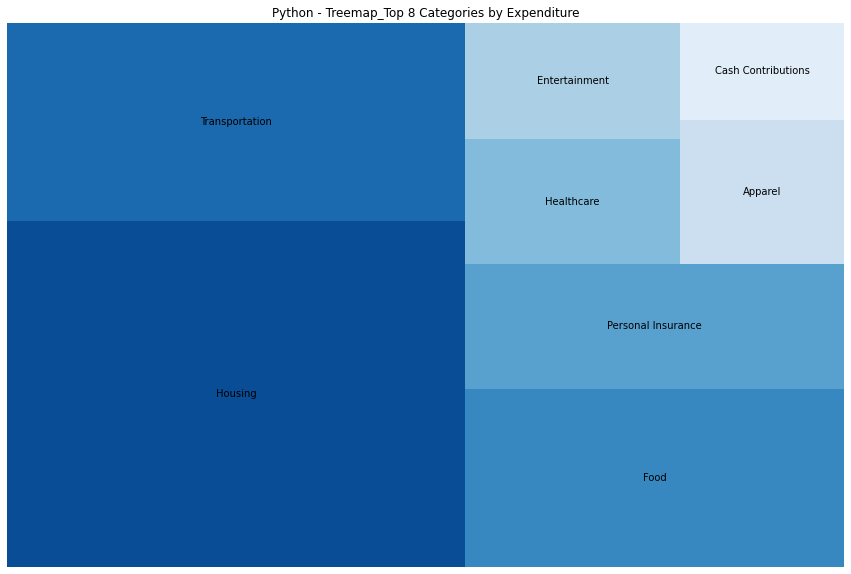

In [17]:
# Display the Treemap
fig, ax = plt.subplots(figsize = (15, 10))
squarify.plot(sizes = Ctg_year.values, label = Ctg_year.index, 
              color = sb.color_palette("Blues_r", len(Ctg_year.values)))
plt.title('Python - Treemap_Top 8 Categories by Expenditure')
ax.axis('off')

plt.show()


## 2. Area Chart

In [6]:
# expenditures per year for sex = 1
expenditures_peryear = expenditures_df.groupby('year')
expenditures_sex1 = expenditures_peryear.apply(lambda x: x[x['sex'] == 1]['expenditure'].sum())
expenditures_sex1

year
1984    21972
1985    23489
1986    23865
1987    24415
1988    25893
1989    27811
1990    28379
1991    29614
1992    30296
1993    30692
1994    31733
1995    32262
1996    33798
1997    34820
1998    35536
1999    36996
2000    38045
2001    39519
2002    40676
2003    40818
2004    43392
2005    46407
2006    48400
2007    49619
2008    50489
dtype: int64

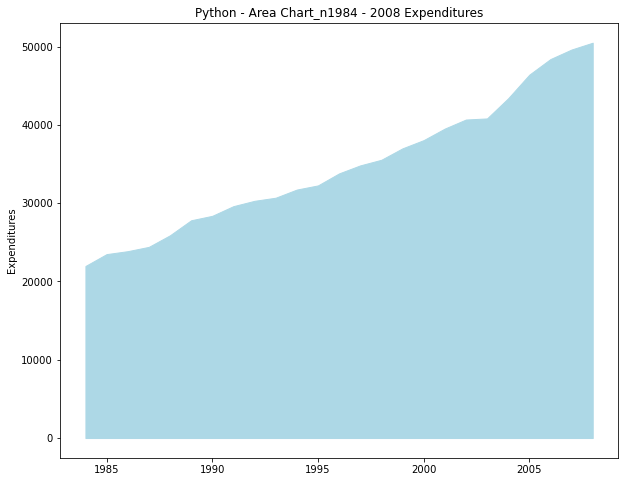

In [7]:
# Display the Area Chart
fig, ax = plt.subplots(figsize=(10,8))

ax.fill_between(expenditures_sex1.keys(), expenditures_sex1.values, color='lightblue')

plt.title('Python - Area Chart_n1984 - 2008 Expenditures')
plt.ylabel('Expenditures')
plt.xlabel('')

plt.show()

## 3.Stacked Area Chart

In [8]:
year_1984 = list(unemployment_df[unemployment_df['Year'] == 1984]['Value'])
year_2000 = list(unemployment_df[unemployment_df['Year'] == 2000]['Value'])
year_2008 = list(unemployment_df[unemployment_df['Year'] == 2008]['Value'])

y_values = {
    '1984': year_1984,
    '2000': year_2000,
    '2008': year_2008
}

y_values

{'1984': [8.0, 7.8, 7.8, 7.7, 7.4, 7.2, 7.5, 7.5, 7.3, 7.4, 7.2, 7.3],
 '2000': [4.0, 4.1, 4.0, 3.8, 4.0, 4.0, 4.0, 4.1, 3.9, 3.9, 3.9, 3.9],
 '2008': [5.0, 4.8, 5.1, 5.0, 5.4, 5.5, 5.8, 6.1, 6.2, 6.6, 6.9, 7.4]}

In [9]:
x = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
x

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

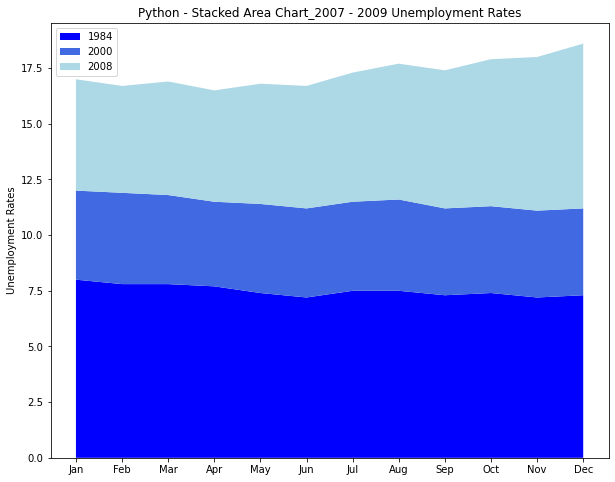

In [10]:
# display the Stack Area Chart
fig, ax = plt.subplots(figsize=(10,8))

ax.stackplot(x, y_values.values(), labels = y_values.keys(), colors = ['blue', 'royalblue', 'lightblue'])
plt.title('Python - Stacked Area Chart_2007 - 2009 Unemployment Rates')
plt.ylabel('Unemployment Rates')
plt.xlabel('')

# legend
ax.legend(loc = 'upper left')

plt.show()
